# COMP 7150 Assignment 3

NAME: __Ealugu Ravi_____________

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

**Each problem is worth 20 points**

#### Dataset

The dataset you'll used for this assignment is diabetes.csv

The target variable is Outcome. The other 8 variables are features.

This dataset was collected from pregnant women.  Each row corresponds to a person.  An Outcome of 0 means the person is not diagnosed with diabetes.  An Outcome of 1 means the person is diagnosed with diabetes.

In [1]:
import pandas as pd

diabetes = pd.read_csv('F:/DataScience_assignments_Ravi/Sem_2/Diabetes/diabetes.csv')

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

**Problem 1**

Suppose that we are interested in finding which feature is relevant to the target variable, Outcome, i.e. which feature does the target is most dependent on.

Which variables do we use chi2? Which variables do we use f_classif?

Explain your answer.

In [3]:
'''
Chi squared test is prefered when there are categorical variables
However as there are no categorical variables we use f_classif ANOVA test to find best suitable featues
'''

'\nChi squared test is prefered when there are categorical variables\nHowever as there are no categorical variables we use f_classif ANOVA test to find best suitable featues\n'

---

**Problem 2**

Between Pregnancies, BloodPressure, BMI, and Age, which feature is the target variable least dependent on?  i.e. which feature is least relevant to the target?

Explain how you obtain your answer.


                          test_statistic       p_value
feature                                               
Pregnancies                    21.591253  4.253136e-06
Glucose                       158.900372  4.391588e-32
BloodPressure                   6.837409  9.178572e-03
SkinThickness                   1.756564  1.856193e-01
Insulin                         9.982341  1.669823e-03
BMI                            62.616998  1.453015e-14
DiabetesPedigreeFunction       12.128312  5.372554e-04
Age                            45.475334  4.017892e-11


'\nForm the P-vales we can infer that lower the p-value most significant the feature is, and lower the p-value higher the test statistic is\nHence among the asked features Blood Pressure is the least significant feature as it has highest p-value \n'

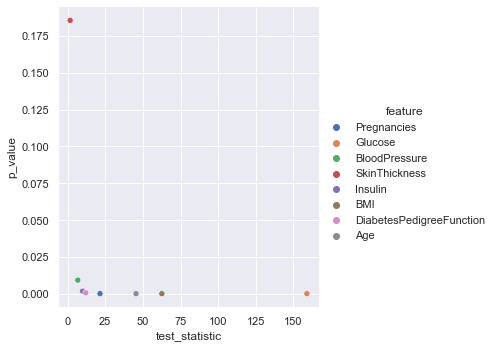

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

scaler=StandardScaler()

#scaler.fit(diabetes.drop(['Outcome'],axis=1))


features = scaler.fit_transform(diabetes.drop(['Outcome'],axis=1))

target= diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

test_statistic,p_value=f_classif(X_train,y_train)


matrix=np.concatenate((test_statistic.reshape(-1,1),p_value.reshape(-1,1)),axis=1)

data=pd.DataFrame(matrix,columns=['test_statistic','p_value'])
data['feature']=diabetes.drop(['Outcome'],axis=1).columns.values.reshape(-1,1)

data=data.set_index('feature')

print(data)
#fs = SelectKBest(f_classif,k='all').fit(X_train,y_train)


sns.relplot(data=data, x='test_statistic', y='p_value', hue='feature')

'''
Form the P-vales we can infer that lower the p-value most significant the feature is, and lower the p-value higher the test statistic is
Hence among the asked features Blood Pressure is the least significant feature as it has highest p-value 
'''

---

**Problem 3**

Using the provided data, build and train two KNN models with 9 neighbors. The first model uses two features Pregnancies and BloodPressure. The second models uses BMI and Age.



In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

diabetes_copy1=diabetes.copy()

diabetes_copy1[['Pregnancies','BloodPressure']]=scaler.fit_transform(diabetes_copy1[['Pregnancies','BloodPressure']])

classifier1 = KNeighborsClassifier(n_neighbors=9)
#Model 1 using Pregnancies, Blood Pressure
#features1 = scaler_two.transform(diabetes[['Pregnancies','BloodPressure']])

X_train1, X_test1, y_train1, y_test1 = train_test_split(diabetes_copy1[['Pregnancies','BloodPressure']], target, test_size=0.2, random_state=42)

classifier1.fit(X_train1,y_train1)

#Model 2 using BMI and Age
diabetes_copy2=diabetes.copy()

diabetes_copy2[['BMI','Age']]=scaler.fit_transform(diabetes_copy2[['BMI','Age']])

classifier2 = KNeighborsClassifier(n_neighbors=9)
#features2 = scaler_two.transform(diabetes[['BMI','Age']])
X_train2, X_test2, y_train2, y_test2 = train_test_split(diabetes_copy2[['BMI','Age']], target, test_size=0.2, random_state=42)

classifier2.fit(X_train2,y_train2)


KNeighborsClassifier(n_neighbors=9)

---

**Problem 4**

Use the data from the following rows as test data to compute the accuracy, precision and recall of the two models in the previous questions.
```
[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]
```

Explain your solution, and test your code.

In [6]:
def calculateAccuracy(X_test_data,y_test_data,features,classifier):
    
    y_pred = classifier.predict(X_test_data)
    
    conf_matrix = confusion_matrix(y_test_data,y_pred)
    print(conf_matrix)

    tp=conf_matrix[0][0]
    fp=conf_matrix[0][1]
    fn=conf_matrix[1][0]
    tn=conf_matrix[1][1]

    precision1=tp/(tp+fp)

    recall1=tp/(tp+fn)

    accuracy1=(tp+tn)/(tp+tn+fp+fn)

    f_score1=(f1_score(y_test_data,y_pred))

    print(f'Precision of model with {features} features is {precision1}')
    print(f'Recall of model with {features} features is {recall1}')
    print(f'Accuracy of model with {features} is {round(accuracy1*100,2)}')
    print(f'F-score of model with {features} features is {f_score1}')
    


test_data = [356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116, 83, 241, 280, 290, 552]
#considering a threshold of 300 in test data. above 300 considered as dabates +ve
#predictions_test=[1,0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1]
#calculateAccuracy(X_test1,y_test1,['Pregnancies','BloodPressure'],classifier1)

#calculateAccuracy(X_test2,y_test2,['BMI','Age'],classifier2)

x_1=np.asarray(diabetes_copy1[['Pregnancies','BloodPressure']].iloc[test_data])
y_test=np.array(diabetes[['Outcome']].iloc[test_data])

x_2=np.asarray(diabetes_copy2[['BMI','Age']].iloc[test_data])

calculateAccuracy(x_1,y_test,['Pregnancies','BloodPressure'],classifier1)

calculateAccuracy(x_2,y_test,['BMI','Age'],classifier2)

[[14  0]
 [ 4  2]]
Precision of model with ['Pregnancies', 'BloodPressure'] features is 1.0
Recall of model with ['Pregnancies', 'BloodPressure'] features is 0.7777777777777778
Accuracy of model with ['Pregnancies', 'BloodPressure'] is 80.0
F-score of model with ['Pregnancies', 'BloodPressure'] features is 0.5
[[14  0]
 [ 3  3]]
Precision of model with ['BMI', 'Age'] features is 1.0
Recall of model with ['BMI', 'Age'] features is 0.8235294117647058
Accuracy of model with ['BMI', 'Age'] is 85.0
F-score of model with ['BMI', 'Age'] features is 0.6666666666666666


C:\Users\psp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\psp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


---

**Problem 5**

Choose the 4 most relevant features using f_classif, and build a KNN model with these 4 features.

Report the accuracy, precision, and recall of the model on the test data obtained from the same rows as shown in the previous problem.

In [8]:
select = SelectKBest(score_func=f_classif, k=4)

fs4=select.fit_transform(features,target)

mask = select.get_support()

new_features = [] # The list of your K best features

for bool_val, feature in zip(mask, diabetes.drop(['Outcome'],axis=1).columns.values.tolist()):
    if bool_val:
        new_features.append(feature)
        
dataframe = scaler.fit_transform(pd.DataFrame(diabetes, columns=new_features))


#print(dataframe)
#print(dataframe.iloc[83])

#diabetes_copy3=diabetes.copy()
required_x=dataframe[test_data]
required_y=np.array(target.iloc[test_data])

#print(required_x)
#print(required_y)

#required_x=scaler.fit_transform(required_x)

classifier = KNeighborsClassifier(n_neighbors=9)

classifier.fit(fs4,target)

calculateAccuracy(required_x,required_y,new_features,classifier)


[[13  1]
 [ 4  2]]
Precision of model with ['Pregnancies', 'Glucose', 'BMI', 'Age'] features is 0.9285714285714286
Recall of model with ['Pregnancies', 'Glucose', 'BMI', 'Age'] features is 0.7647058823529411
Accuracy of model with ['Pregnancies', 'Glucose', 'BMI', 'Age'] is 75.0
F-score of model with ['Pregnancies', 'Glucose', 'BMI', 'Age'] features is 0.4444444444444444
